In [34]:
import sys
sys.path.append('./code')
sys.path.append('./data')

from clustering import *
import pandas as pd

np.random.seed(1)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 1.25

In [35]:
data = pd.read_excel("data/24H.xlsx",index_col=0)

c:\Users\Chris\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [36]:
data.head()
data=data[data["H24"]!=0]

In [37]:
data.loc[(data!=0).any(axis=1)]

,Name,Age,Country,Gender,H1,H2,H3,H4,H5,H6,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
Number,,,,,,,,,,,,,,,,,,,,,
1,SCHOLZ SHARON,36,AUS,Female,6,13,19,25,31,36,...,37,37,37,37,37,37,37,37,37,37
2,HARVEY – JAMIESON SUSANNAH,20,AUS,Female,6,13,20,25,29,29,...,50,50,50,50,50,50,50,50,50,50
3,LILLEY ALLISON,42,AUS,Female,6,13,20,25,31,36,...,87,91,96,101,105,111,115,120,125,131
4,CORINO MARYLOU,34,CAN,Female,6,12,19,24,30,36,...,78,82,85,89,93,96,100,104,107,112
5,CROMIE CHERIE,36,CAN,Female,6,12,18,22,28,33,...,76,80,84,88,91,94,95,98,102,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,FEJES JOE,47,USA,Male,6,14,22,29,37,44,...,101,108,114,119,125,131,137,143,148,153
260,LEWIS HARVEY,36,USA,Male,8,16,25,31,39,46,...,105,111,116,121,127,134,140,146,150,155
261,MCCARTHY PHILIP,44,USA,Male,7,15,24,30,38,45,...,96,99,103,108,113,117,122,127,130,134


In [38]:
data_array=data.values
lap_times = data_array[:,4:].astype('int64')

In [39]:
end_times = np.zeros(len(lap_times),)
for i in range(len(lap_times)):
    end_times[i] = np.where(lap_times[i,:]== lap_times[i,-1])[0][0]

In [40]:
lap_speeds = lap_times[:,1:] - lap_times[:,0:-1] 
lap_speeds = np.insert(lap_speeds,0, lap_times[:,0],axis=1)

flattened_speeds = lap_speeds.flatten()

In [41]:
end_times = end_times.astype('int64')
lap_times_nan = lap_times.astype('float64')

lap_speeds_nan = lap_speeds.astype('float64')

for i in range(len(lap_times)):
    lap_times_nan[i,end_times[i]+1:] = np.nan
    lap_speeds_nan[i,end_times[i]+1:] = np.nan

flattened_speeds_nan =    lap_speeds_nan.flatten()

(array([ 157.,  105.,  176.,  406.,  715., 1179., 1554., 1018.,  247.,
          31.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

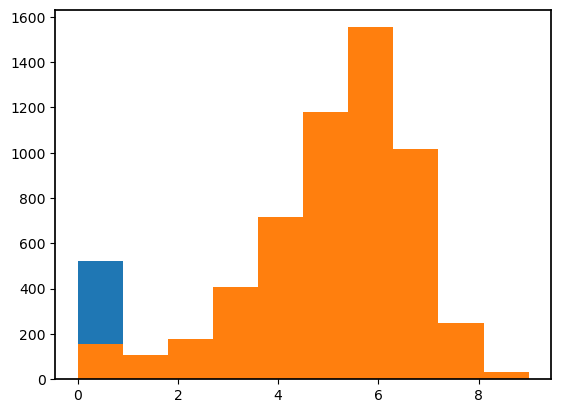

In [42]:
plt.hist(flattened_speeds,10)
plt.hist(flattened_speeds_nan,10)


In [43]:
normalized_speeds = np.zeros(np.shape(lap_speeds_nan))

for i in range(len(lap_times)):
    avg_speed_i = lap_times[i, end_times[i]]/end_times[i]
    normalized_speeds[i,:] = lap_speeds_nan[i,:]/avg_speed_i

(array([ 165.,   75.,  114.,  343.,  833., 1671., 1357.,  591.,  247.,
          96.,   49.,   10.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        ]),
 <BarContainer object of 12 artists>)

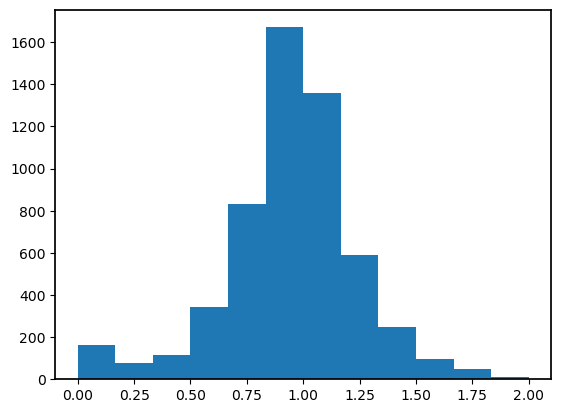

In [44]:
plt.hist(normalized_speeds.flatten(),bins=np.linspace(0,2,13))

In [45]:
discrete_norm_speed_labels = np.zeros(np.shape(lap_speeds))
discrete_norm_speed_labels[np.isnan(normalized_speeds)] =0 # ended race
hi_thresh = 1.5
lo_thresh = 0.5
discrete_norm_speed_labels[(normalized_speeds<=lo_thresh)] =1 # slow 
discrete_norm_speed_labels[(normalized_speeds>lo_thresh)&(normalized_speeds<=hi_thresh)] =2 # normal 
discrete_norm_speed_labels[(normalized_speeds>=hi_thresh)] =3 # fast
discrete_norm_speed_labels = discrete_norm_speed_labels.astype('int64')

In [46]:
#discrete_speed_labels = np.zeros(np.shape(lap_speeds))
#discrete_speed_labels[lap_speeds==0] =0
#discrete_speed_labels[(lap_speeds>0)&(lap_speeds<=3)] =1
#discrete_speed_labels[lap_speeds>3] =2
#discrete_speed_labels = discrete_speed_labels.astype('int64')

In [47]:
#discrete_speed_labels2 = np.zeros(np.shape(lap_speeds))
#discrete_speed_labels2[np.isnan(lap_speeds_nan)] =0
#discrete_speed_labels2[lap_speeds<3] =1
#discrete_speed_labels2[lap_speeds>=3] =2
#discrete_speed_labels2 = discrete_speed_labels.astype('int64')

In [48]:
np.nanmax(lap_speeds)

9

In [49]:
Xt = lap_speeds.astype('int64')
nClustMax=10
nStates= 10
nEM=1000

zHat, muHat, qHat, pHat, steps, logL = doVEMmultiPar(Xt, nClustMax, nStates, nEM=nEM)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.1s finished


(array([  0.,   0.,   0.,   0.,   0., 248.,   0.,   0.,   0.,   0.]),
 array([8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5]),
 <BarContainer object of 10 artists>)

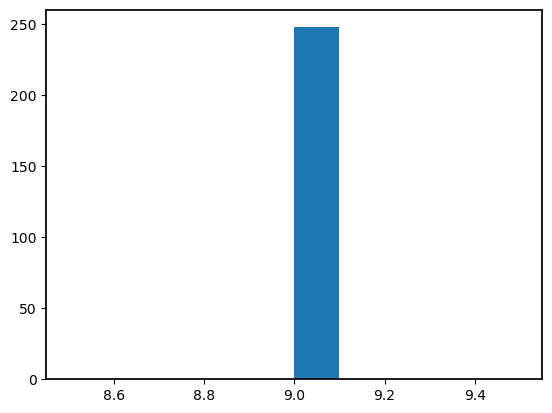

In [50]:
predictLabels = zHat.argmax(axis=1)
plt.hist(predictLabels)




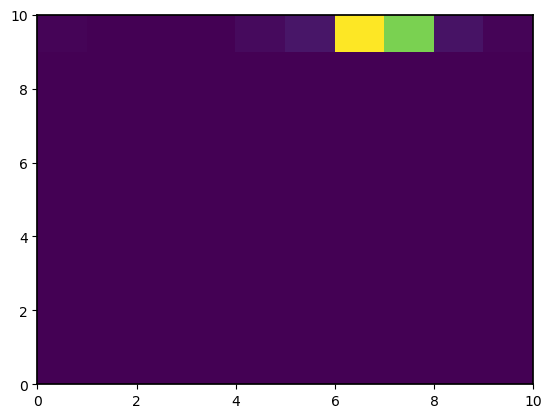

In [51]:
plt.pcolor(qHat)

In [52]:
# ok using integer lap speeds does not work. let's try splitting into groups

In [53]:
Xt = discrete_norm_speed_labels
nClustMax=10
nStates= 4
nEM=1000

zHat, muHat, qHat, pHat, steps, logL = doVEMmultiPar(Xt, nClustMax, nStates, nEM=nEM)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 969 out of 1000 | elapsed:   15.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.8s finished


In [54]:
predictLabels = zHat.argmax(axis=1)


(array([  7.,   0.,   0., 183.,   0.,   0.,   0.,   0.,   0.,  58.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 10 artists>)

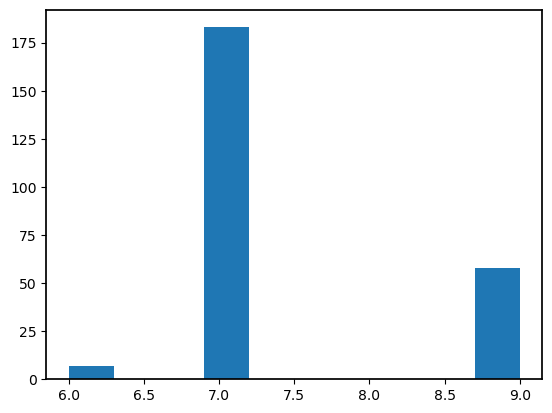

In [55]:
plt.hist(predictLabels)

C:\Users\Chris\AppData\Local\Temp\ipykernel_12320\2402996707.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(normalized_speeds[predictLabels==i,:],axis=0))


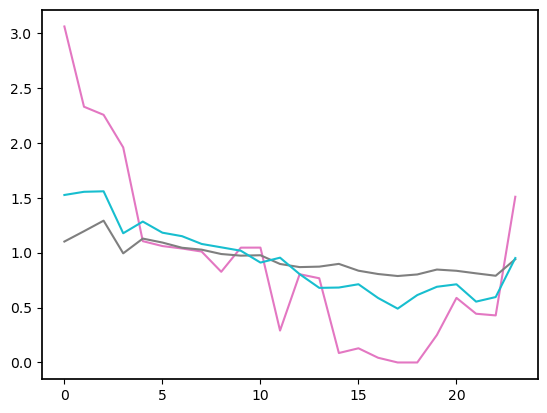

In [56]:
for i in range(nClustMax):
    plt.plot(np.nanmean(normalized_speeds[predictLabels==i,:],axis=0))

C:\Users\Chris\AppData\Local\Temp\ipykernel_12320\3982608981.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(lap_times_nan[predictLabels==i,:],axis=0))


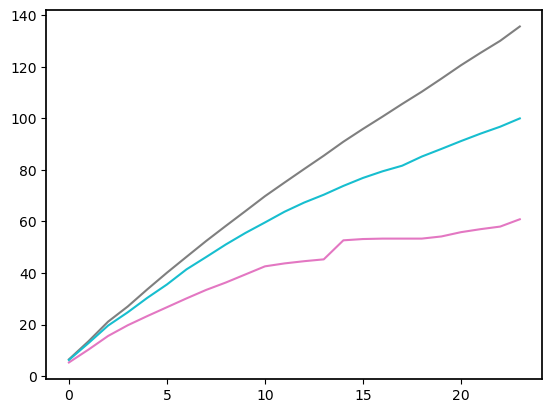

In [57]:
for i in range(nClustMax):
    plt.plot(np.nanmean(lap_times_nan[predictLabels==i,:],axis=0))

In [58]:
non_zero_labels = np.unique(predictLabels).astype('int64')

In [59]:
labelcounts=np.array([sum(predictLabels== label) for label in non_zero_labels])

In [60]:
non_zero_labels = non_zero_labels[np.argsort(-labelcounts)]

In [61]:
non_zero_labels

array([7, 9, 6], dtype=int64)

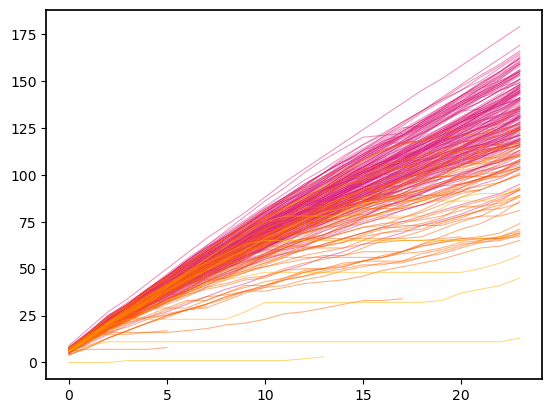

In [62]:
colors = np.array(['#785EF0', '#DC267F', '#FE6100', '#FFB000','#648FFF'])

i=0
plt.plot(lap_times_nan[predictLabels==non_zero_labels[i],:].T,color=colors[1],linewidth=0.75,alpha=0.5)
i=1
plt.plot(lap_times_nan[predictLabels==non_zero_labels[i],:].T,color=colors[2],linewidth=0.75,alpha=0.5)
i=2
plt.plot(lap_times_nan[predictLabels==non_zero_labels[i],:].T,color=colors[3],linewidth=0.75,alpha=0.5)


(0.0, 2.0)

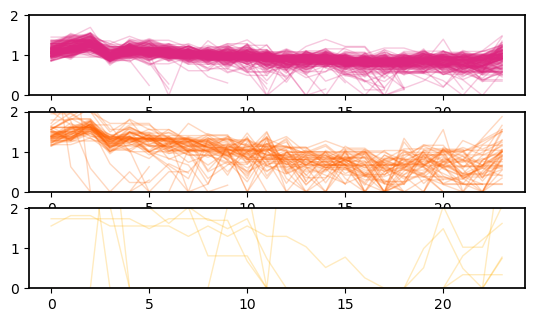

In [63]:
colors = np.array(['#785EF0', '#DC267F', '#FE6100', '#FFB000','#648FFF'])

i=0
plt.subplot(4,1,1)
plt.plot(normalized_speeds[predictLabels==non_zero_labels[i],:].T,color=colors[1],linewidth=1,alpha=0.25)
i=1
plt.ylim([0,2])

plt.subplot(4,1,2)
plt.plot(normalized_speeds[predictLabels==non_zero_labels[i],:].T,color=colors[2],linewidth=1,alpha=0.25)
i=2
plt.ylim([0,2])

plt.subplot(4,1,3)
plt.plot(normalized_speeds[predictLabels==non_zero_labels[i],:].T,color=colors[3],linewidth=1,alpha=0.25)
i=3
plt.ylim([0,2])


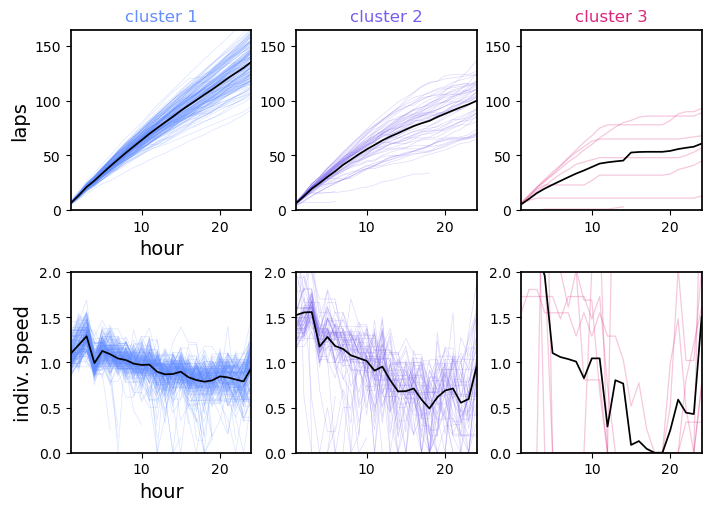

In [67]:
colors = np.array(['#648FFF', '#785EF0', '#DC267F', '#FFB000', '#FE6100'])


fig, ax = plt.subplots(3,3,figsize=(7,6),layout='constrained') 

ax[0,0].plot(np.linspace(1,24,24),lap_times_nan[predictLabels==non_zero_labels[0],:].T,color=colors[0],linewidth=0.45,alpha=0.25)
ax[0,1].plot(np.linspace(1,24,24),lap_times_nan[predictLabels==non_zero_labels[1],:].T,color=colors[1],linewidth=0.45,alpha=0.25)
ax[0,2].plot(np.linspace(1,24,24),lap_times_nan[predictLabels==non_zero_labels[2],:].T,color=colors[2],linewidth=0.9,alpha=0.25)

ax[0,0].plot(np.linspace(1,24,24),np.nanmean(lap_times_nan[predictLabels==non_zero_labels[0],:],axis=0),color='k',linewidth=1.25,alpha=1)
ax[0,1].plot(np.linspace(1,24,24),np.nanmean(lap_times_nan[predictLabels==non_zero_labels[1],:],axis=0),color='k',linewidth=1.25,alpha=1)
ax[0,2].plot(np.linspace(1,24,24),np.nanmean(lap_times_nan[predictLabels==non_zero_labels[2],:],axis=0),color='k',linewidth=1.25,alpha=1)


ax[1,0].plot(np.linspace(1,24,24),normalized_speeds[predictLabels==non_zero_labels[0],:].T,color=colors[0],linewidth=0.45,alpha=0.25)
ax[1,1].plot(np.linspace(1,24,24),normalized_speeds[predictLabels==non_zero_labels[1],:].T,color=colors[1],linewidth=0.45,alpha=0.25)
ax[1,2].plot(np.linspace(1,24,24),normalized_speeds[predictLabels==non_zero_labels[2],:].T,color=colors[2],linewidth=0.9,alpha=0.25)

ax[1,0].plot(np.linspace(1,24,24),np.nanmean(normalized_speeds[predictLabels==non_zero_labels[0],:],axis=0),color='k',linewidth=1.25,alpha=1)
ax[1,1].plot(np.linspace(1,24,24),np.nanmean(normalized_speeds[predictLabels==non_zero_labels[1],:],axis=0),color='k',linewidth=1.25,alpha=1)
ax[1,2].plot(np.linspace(1,24,24),np.nanmean(normalized_speeds[predictLabels==non_zero_labels[2],:],axis=0),color='k',linewidth=1.25,alpha=1)

list0 = np.where(predictLabels==non_zero_labels[0])[0]
list1 = np.where(predictLabels==non_zero_labels[1])[0]
list2 = np.where(predictLabels==non_zero_labels[2])[0]




for i in list0:
    ax[2,0].plot(lap_times[i,:],normalized_speeds[i,:],color=colors[0],linewidth=0.45,alpha=0.25)

for i in list1:
    ax[2,1].plot(lap_times[i,:],normalized_speeds[i,:],color=colors[1],linewidth=0.45,alpha=0.25)

for i in list2:
    ax[2,2].plot(lap_times[i,:],normalized_speeds[i,:],color=colors[2],linewidth=0.9,alpha=0.25)   

#ax[2,0].plot(lap_times[predictLabels==non_zero_labels[1],1:],normalized_speeds[predictLabels==non_zero_labels[1],:],color=colors[1],linewidth=0.45,alpha=0.25)
#ax[2,1].plot(lap_times[predictLabels==non_zero_labels[0],1:],normalized_speeds[predictLabels==non_zero_labels[0],:],color=colors[0],linewidth=0.45,alpha=0.25)
#ax[2,2].plot(lap_times[predictLabels==non_zero_labels[2],1:],normalized_speeds[predictLabels==non_zero_labels[2],:],color=colors[2],linewidth=0.45,alpha=0.25)

xbins=15
xvals = lap_times[list0,:].flatten()
yvals = normalized_speeds[list0,:].flatten()
xedges = np.linspace(xvals.min(), xvals.max(), xbins+1)
xedges[0] -= 0.00001
xedges[-1] += 0.000001
c = pd.cut(xvals, xedges)
g = pd.Series(yvals).groupby(c)#pd.groupby(pd.Series(yvals), c.labels)
mean2 = g.mean().values
ax[2,0].plot(xedges[1:]*0.5+0.5*xedges[:-1],mean2,linewidth=1.25,color='k')


xvals = lap_times[list1,:].flatten()
yvals = normalized_speeds[list1,:].flatten()
xedges = np.linspace(xvals.min(), xvals.max(), xbins+1)
xedges[0] -= 0.00001
xedges[-1] += 0.000001
c = pd.cut(xvals, xedges)
g = pd.Series(yvals).groupby(c)#pd.groupby(pd.Series(yvals), c.labels)
mean2 = g.mean().values
ax[2,1].plot(xedges[1:]*0.5+0.5*xedges[:-1],mean2,linewidth=1.25,color='k')



xvals = lap_times[list2,:].flatten()
yvals = normalized_speeds[list2,:].flatten()
xedges = np.linspace(xvals.min(), xvals.max(), xbins+1)
xedges[0] -= 0.00001
xedges[-1] += 0.000001
c = pd.cut(xvals, xedges)
g = pd.Series(yvals).groupby(c)#pd.groupby(pd.Series(yvals), c.labels)
mean2 = g.mean().values
ax[2,2].plot(xedges[1:]*0.5+0.5*xedges[:-1],mean2,linewidth=1.25,color='k')




ax[0,0].set_ylim([0,165])
ax[0,1].set_ylim([0,165])
ax[0,2].set_ylim([0,165])

ax[1,0].set_ylim([0,2])
ax[1,1].set_ylim([0,2])
ax[1,2].set_ylim([0,2])


ax[2,0].set_ylim([0,2])
ax[2,1].set_ylim([0,2])
ax[2,2].set_ylim([0,2])



ax[2,0].set_xlim([0,165])
ax[2,1].set_xlim([0,165])
ax[2,2].set_xlim([0,165])


ax[0,0].set_xlim([1,24])
ax[0,1].set_xlim([1,24])
ax[0,2].set_xlim([1,24])

ax[1,0].set_xlim([1,24])
ax[1,1].set_xlim([1,24])
ax[1,2].set_xlim([1,24])

ax[0,0].set_xlabel('hour',fontsize=14)
ax[0,0].set_ylabel('laps',fontsize=14)

ax[1,0].set_xlabel('hour',fontsize=14)
ax[1,0].set_ylabel('indiv. speed',fontsize=14)

ax[2,0].set_xlabel('laps',fontsize=14)
ax[2,0].set_ylabel('indiv. speed',fontsize=14)


ax[0,0].set_title('cluster 1',color=colors[0])
ax[0,1].set_title('cluster 2',color=colors[1])
ax[0,2].set_title('cluster 3',color=colors[2])


#ax[0,1].set_xticklabels([])
#ax[0,2].set_xticklabels([])

#ax[1,1].set_xticklabels([])
#ax[1,2].set_xticklabels([])

#ax[2,1].set_xticklabels([])
#ax[2,2].set_xticklabels([])


plt.savefig('figs/ultrarunners.pdf')


In [65]:
muHat/sum(muHat)

array([4.01606426e-04, 4.01606426e-04, 4.01606426e-04, 4.01606426e-04,
       4.01606426e-04, 4.01606426e-04, 2.71279746e-02, 7.18983657e-01,
       4.01606426e-04, 2.51077123e-01])